In [1]:
 %matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import math
import pandas as pd

In [2]:
#waveform functions to make importing data easier
def waveforms(energystart, energyend, adjtime):
    s_energy = UTCDateTime(energystart)
    e_energy = UTCDateTime(energyend)
    start_t = s_energy - adjtime
    end_t = e_energy + adjtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def waveform_plotter(date, filtered, event, ax, ylim = False, channels = [0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[channel]), fill_value=200) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)
    
    if ylim == True:
        ax.set_ylim(-800,1000)

    ax.set_title(event + "\n" + "UTC " + d, size=10)
    
def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text
    
def xyz_plotter(date, filtered, event, ax, ylim = False, channels=[0,1,2]):
    day = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            U = filtered[channel].data
        elif code == 'BHV':
            V = filtered[channel].data
        elif code == 'BHW':
            W = filtered[channel].data
            
    
    d = np.radians(-30)
    aU = np.radians(135)
    aV = np.radians(15)
    aW = np.radians(255)
    
    A = np.array([[np.cos(d)*np.sin(aU),np.cos(d)*np.cos(aU),np.sin(d)],
    [np.cos(d)*np.sin(aV), np.cos(d)*np.cos(aV), np.sin(d)],
    [np.cos(d)*np.sin(aW), np.cos(d)*np.cos(aW), np.sin(d)]])
    
    B = np.linalg.inv(A)
    
    E,N,Z = np.dot(B,(U,V,W))

    offset = np.full(len(Z), fill_value=200)

    ax.plot(t, E + 2*offset, label='East', color = "#77e59b", alpha = 0.8)
    ax.plot(t, N + offset, label='North', color = "#ffabab", alpha = 0.8)
    ax.plot(t, Z, label = 'Z', color = "#b28dff", alpha = 0.8)

    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

    if ylim == True:
        ax.set_ylim(-1800,2000)
        
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)

    ax.set_title(event + "\n" + "UTC " + day, size=10)

<IPython.core.display.Javascript object>


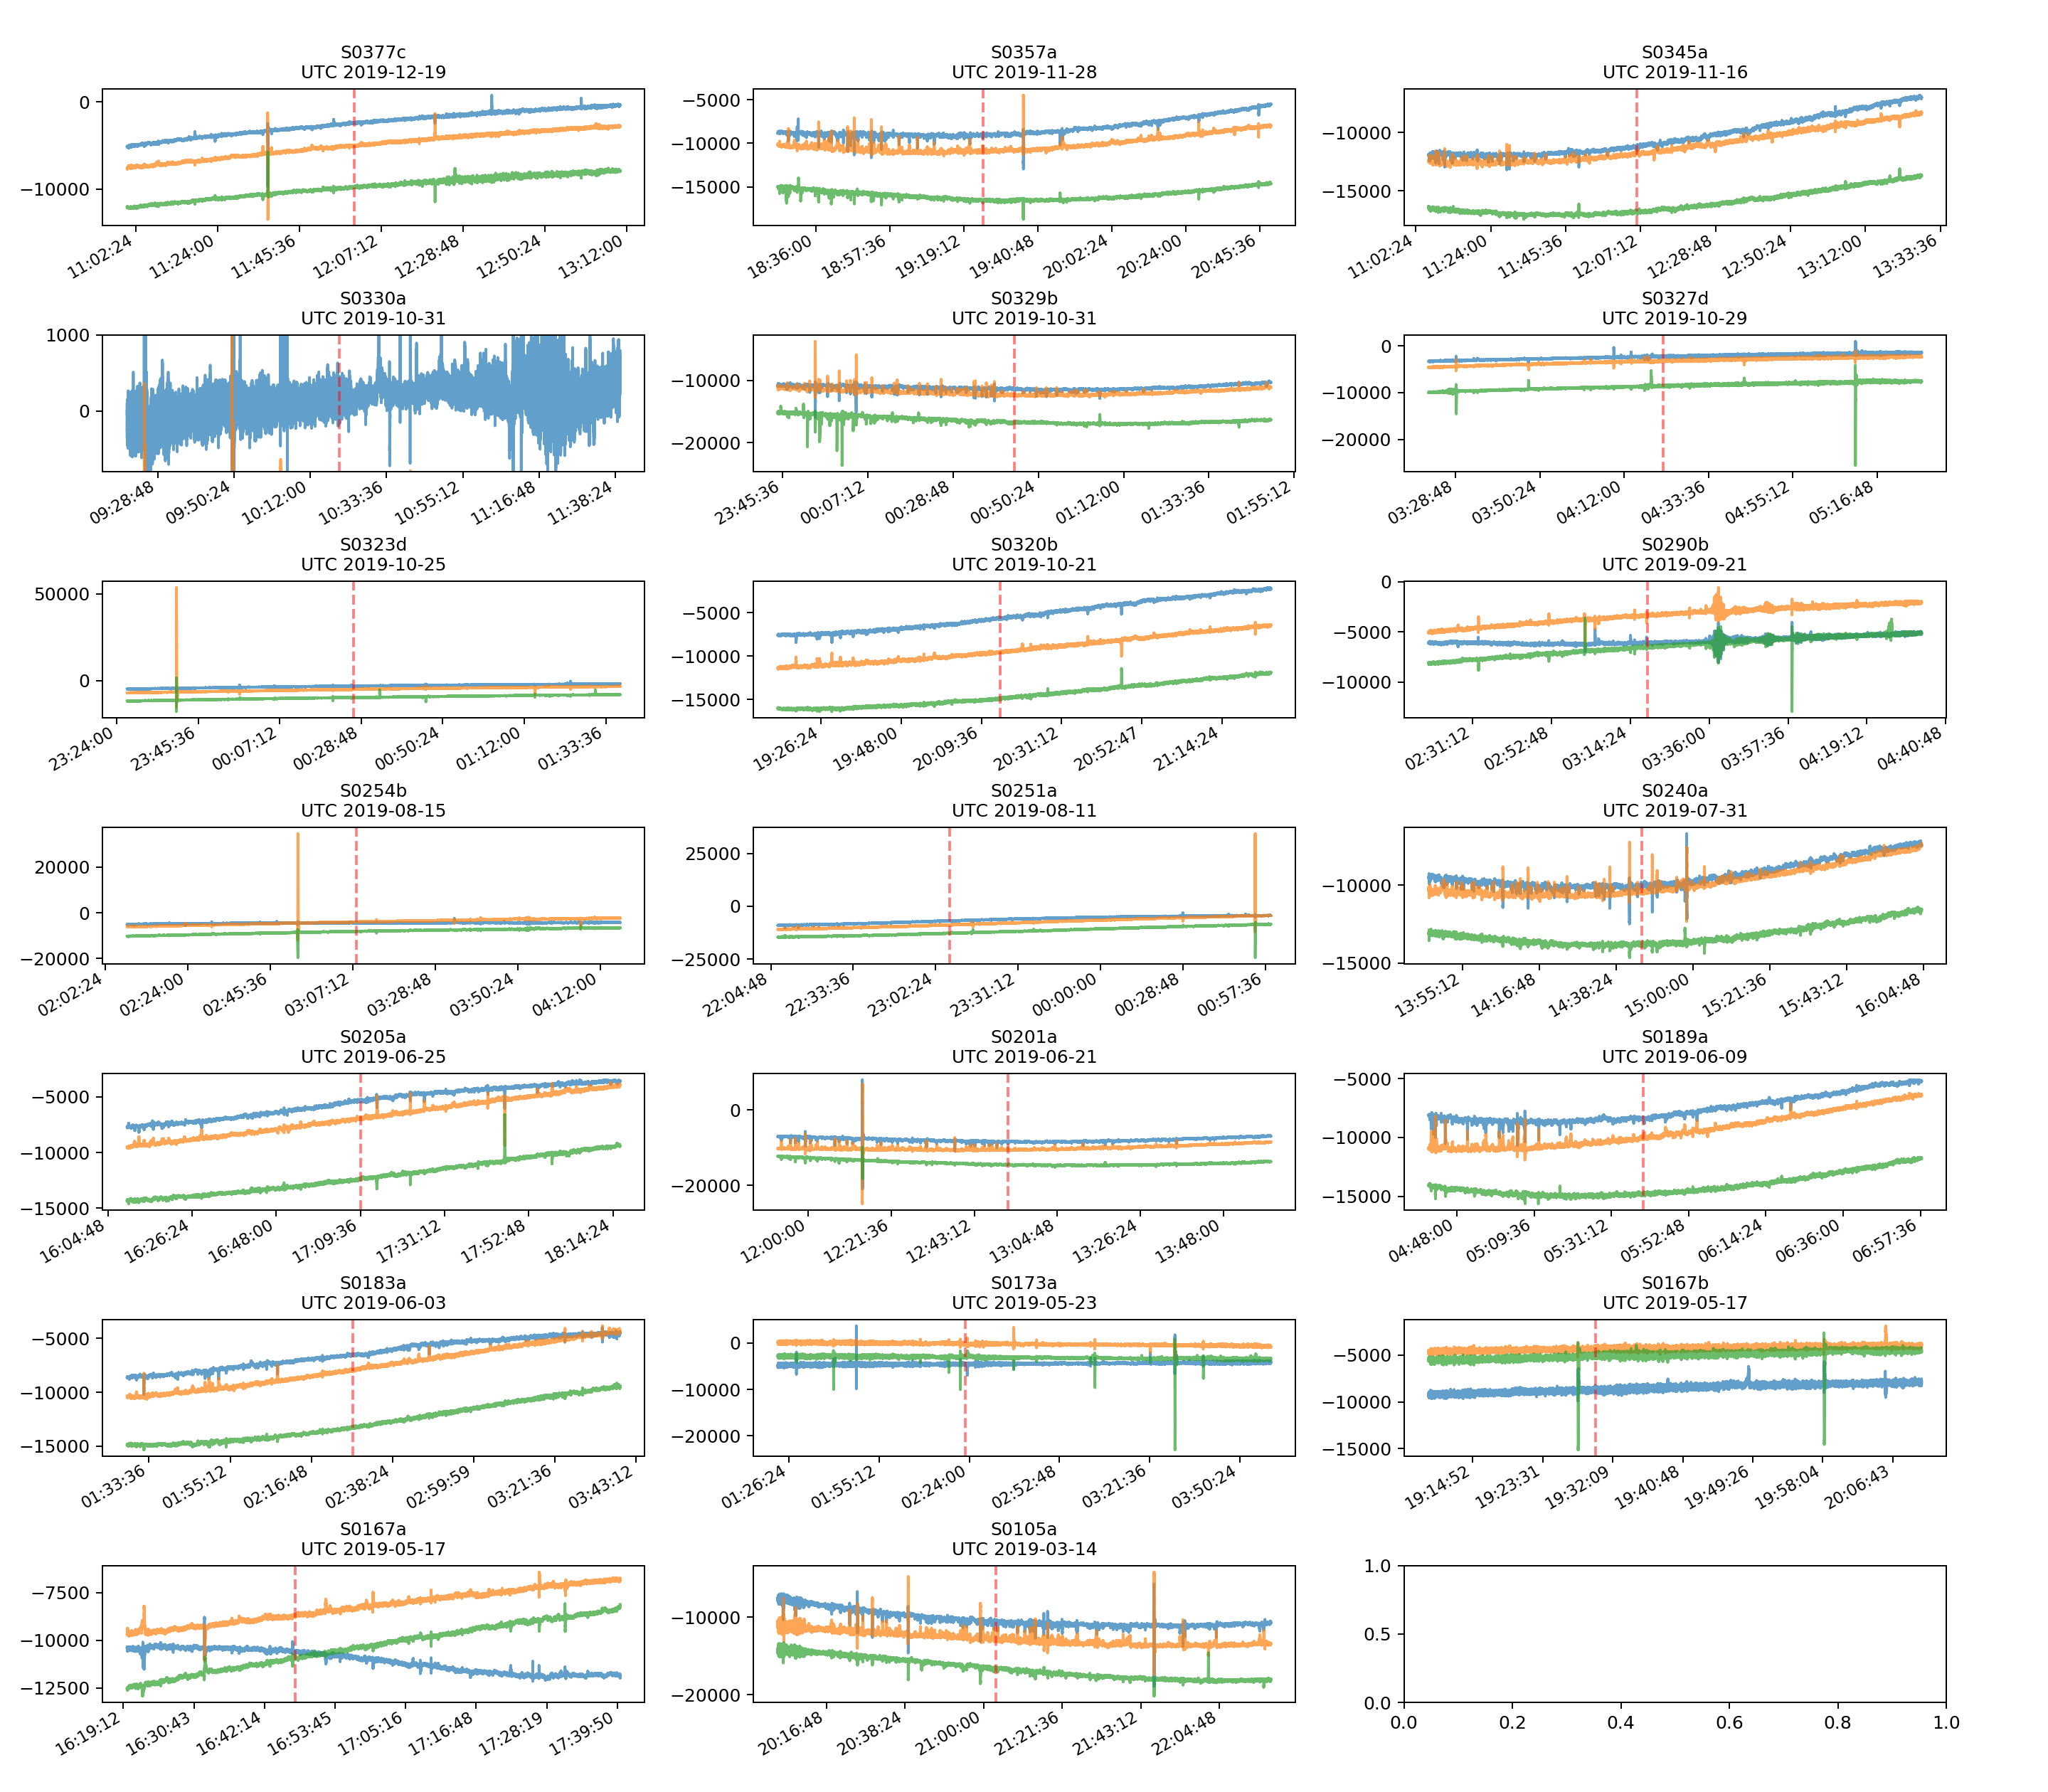

<IPython.core.display.Javascript object>


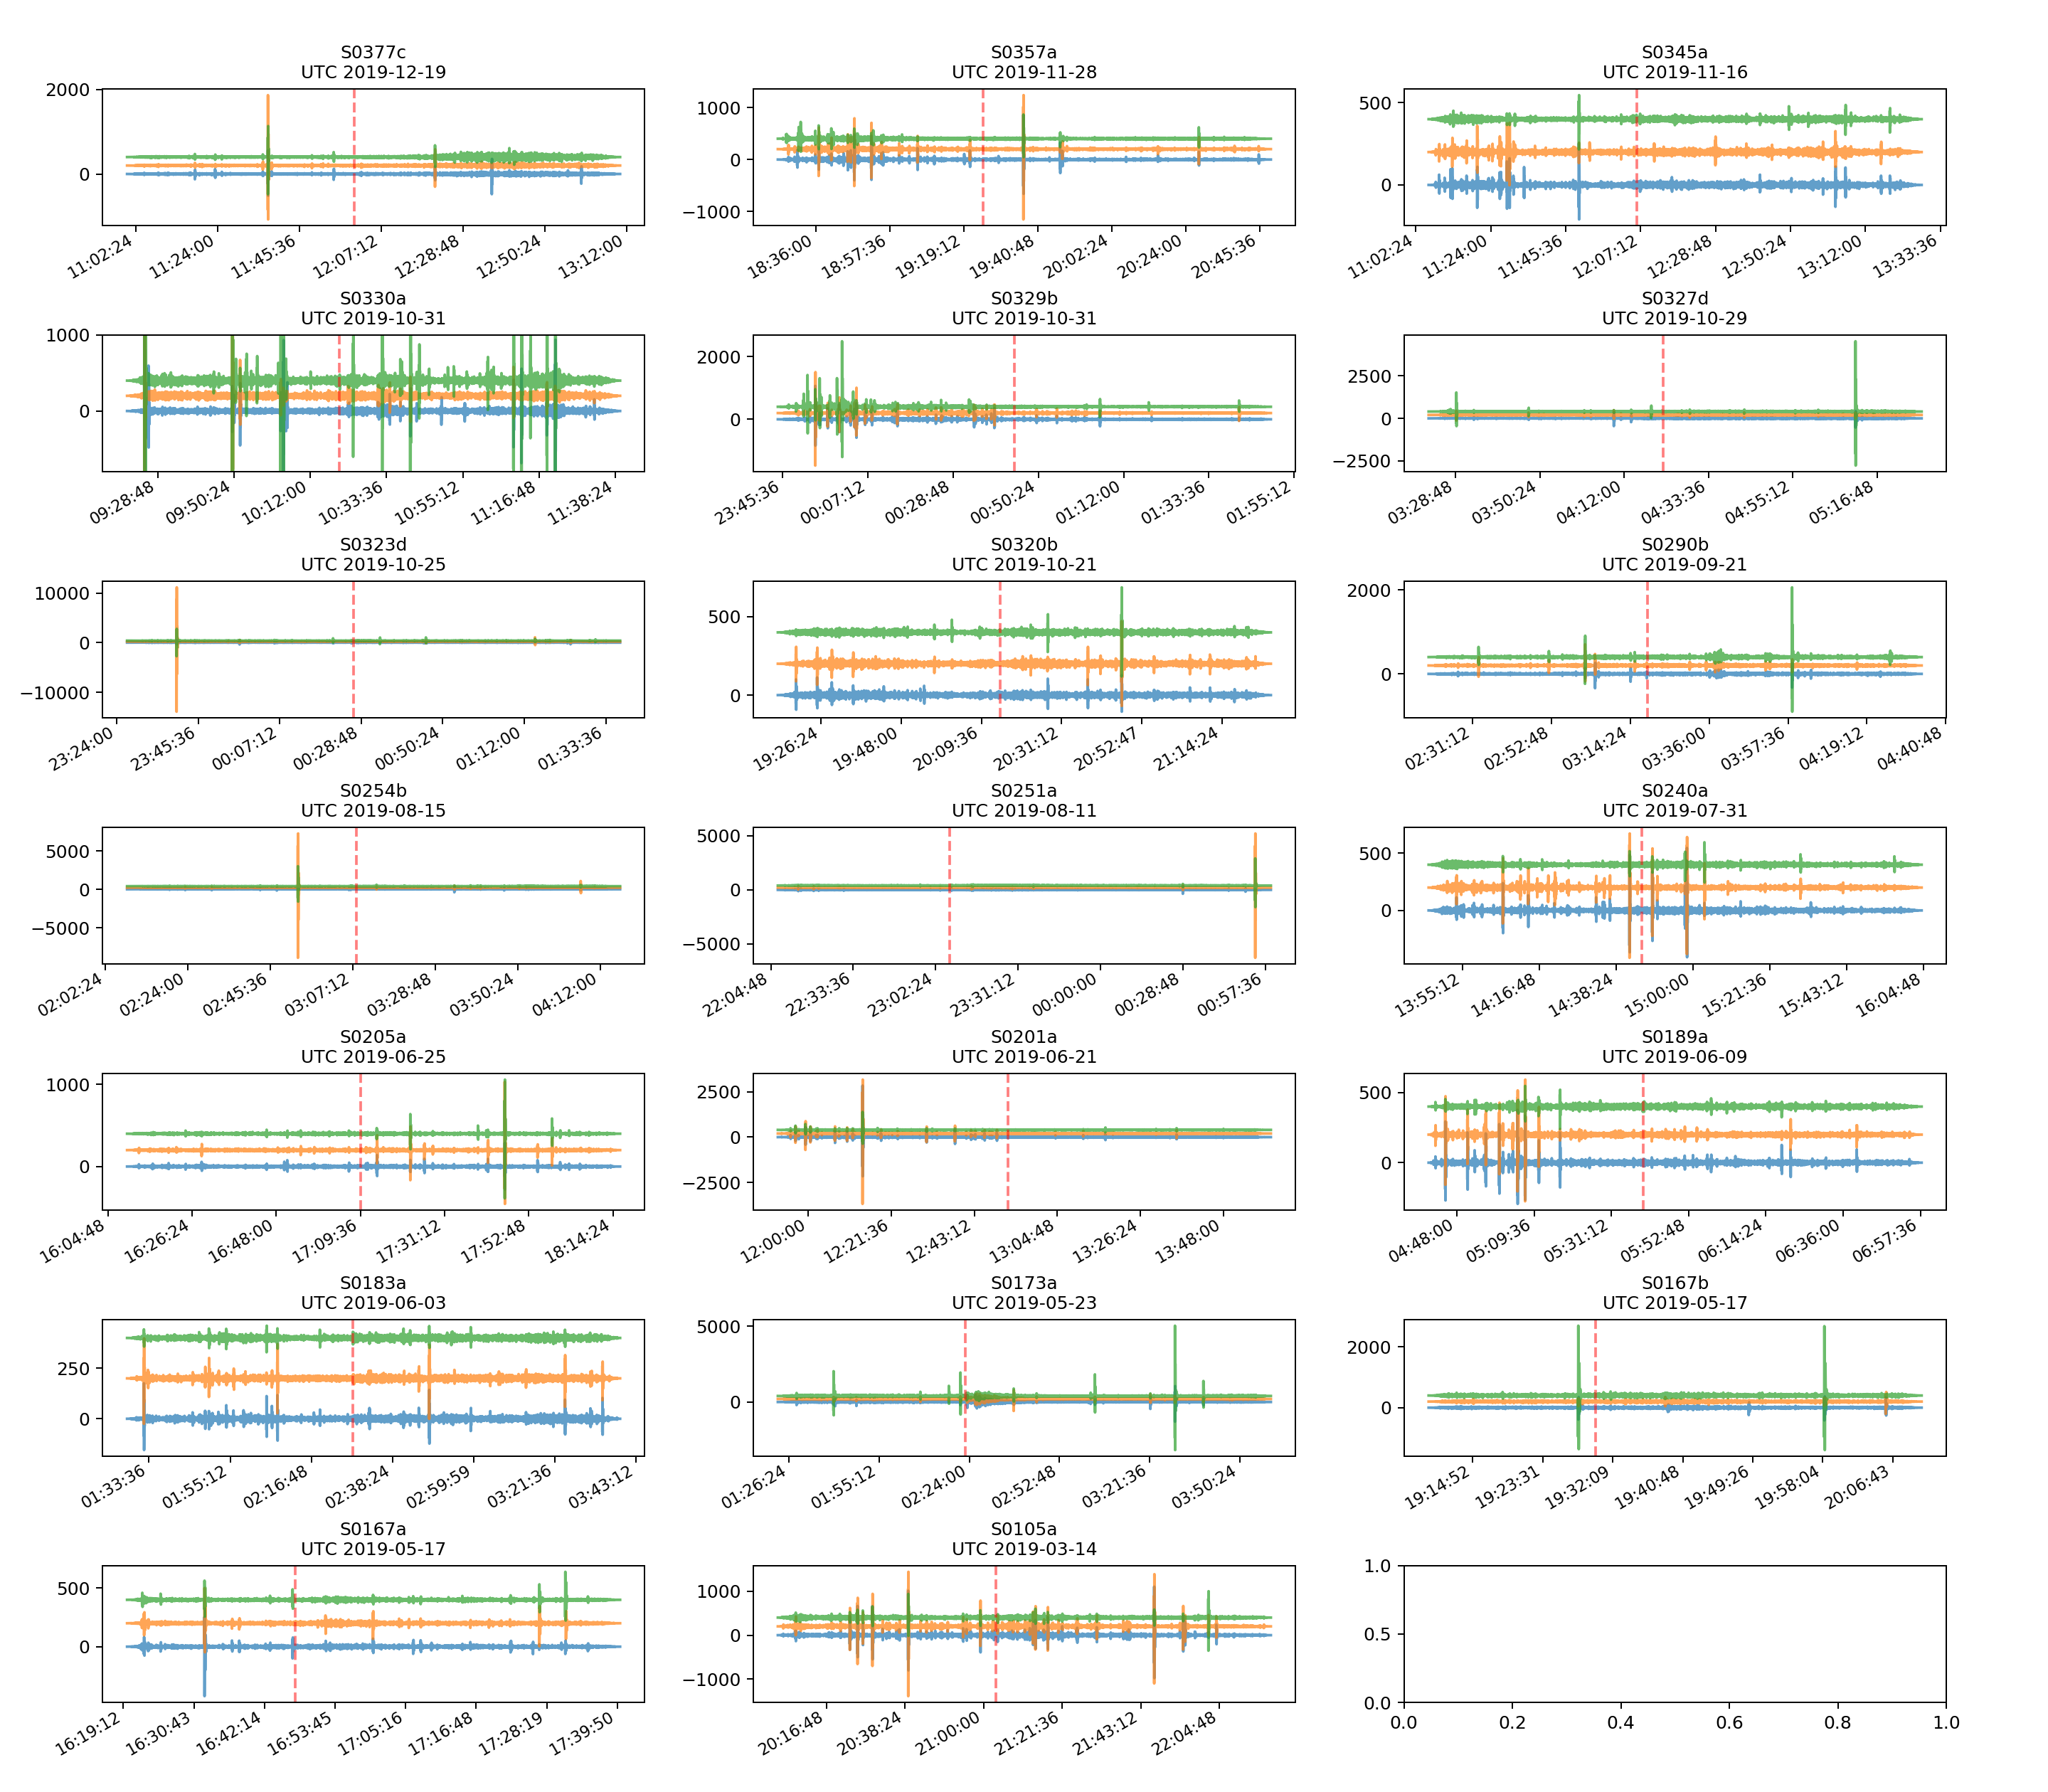

<IPython.core.display.Javascript object>


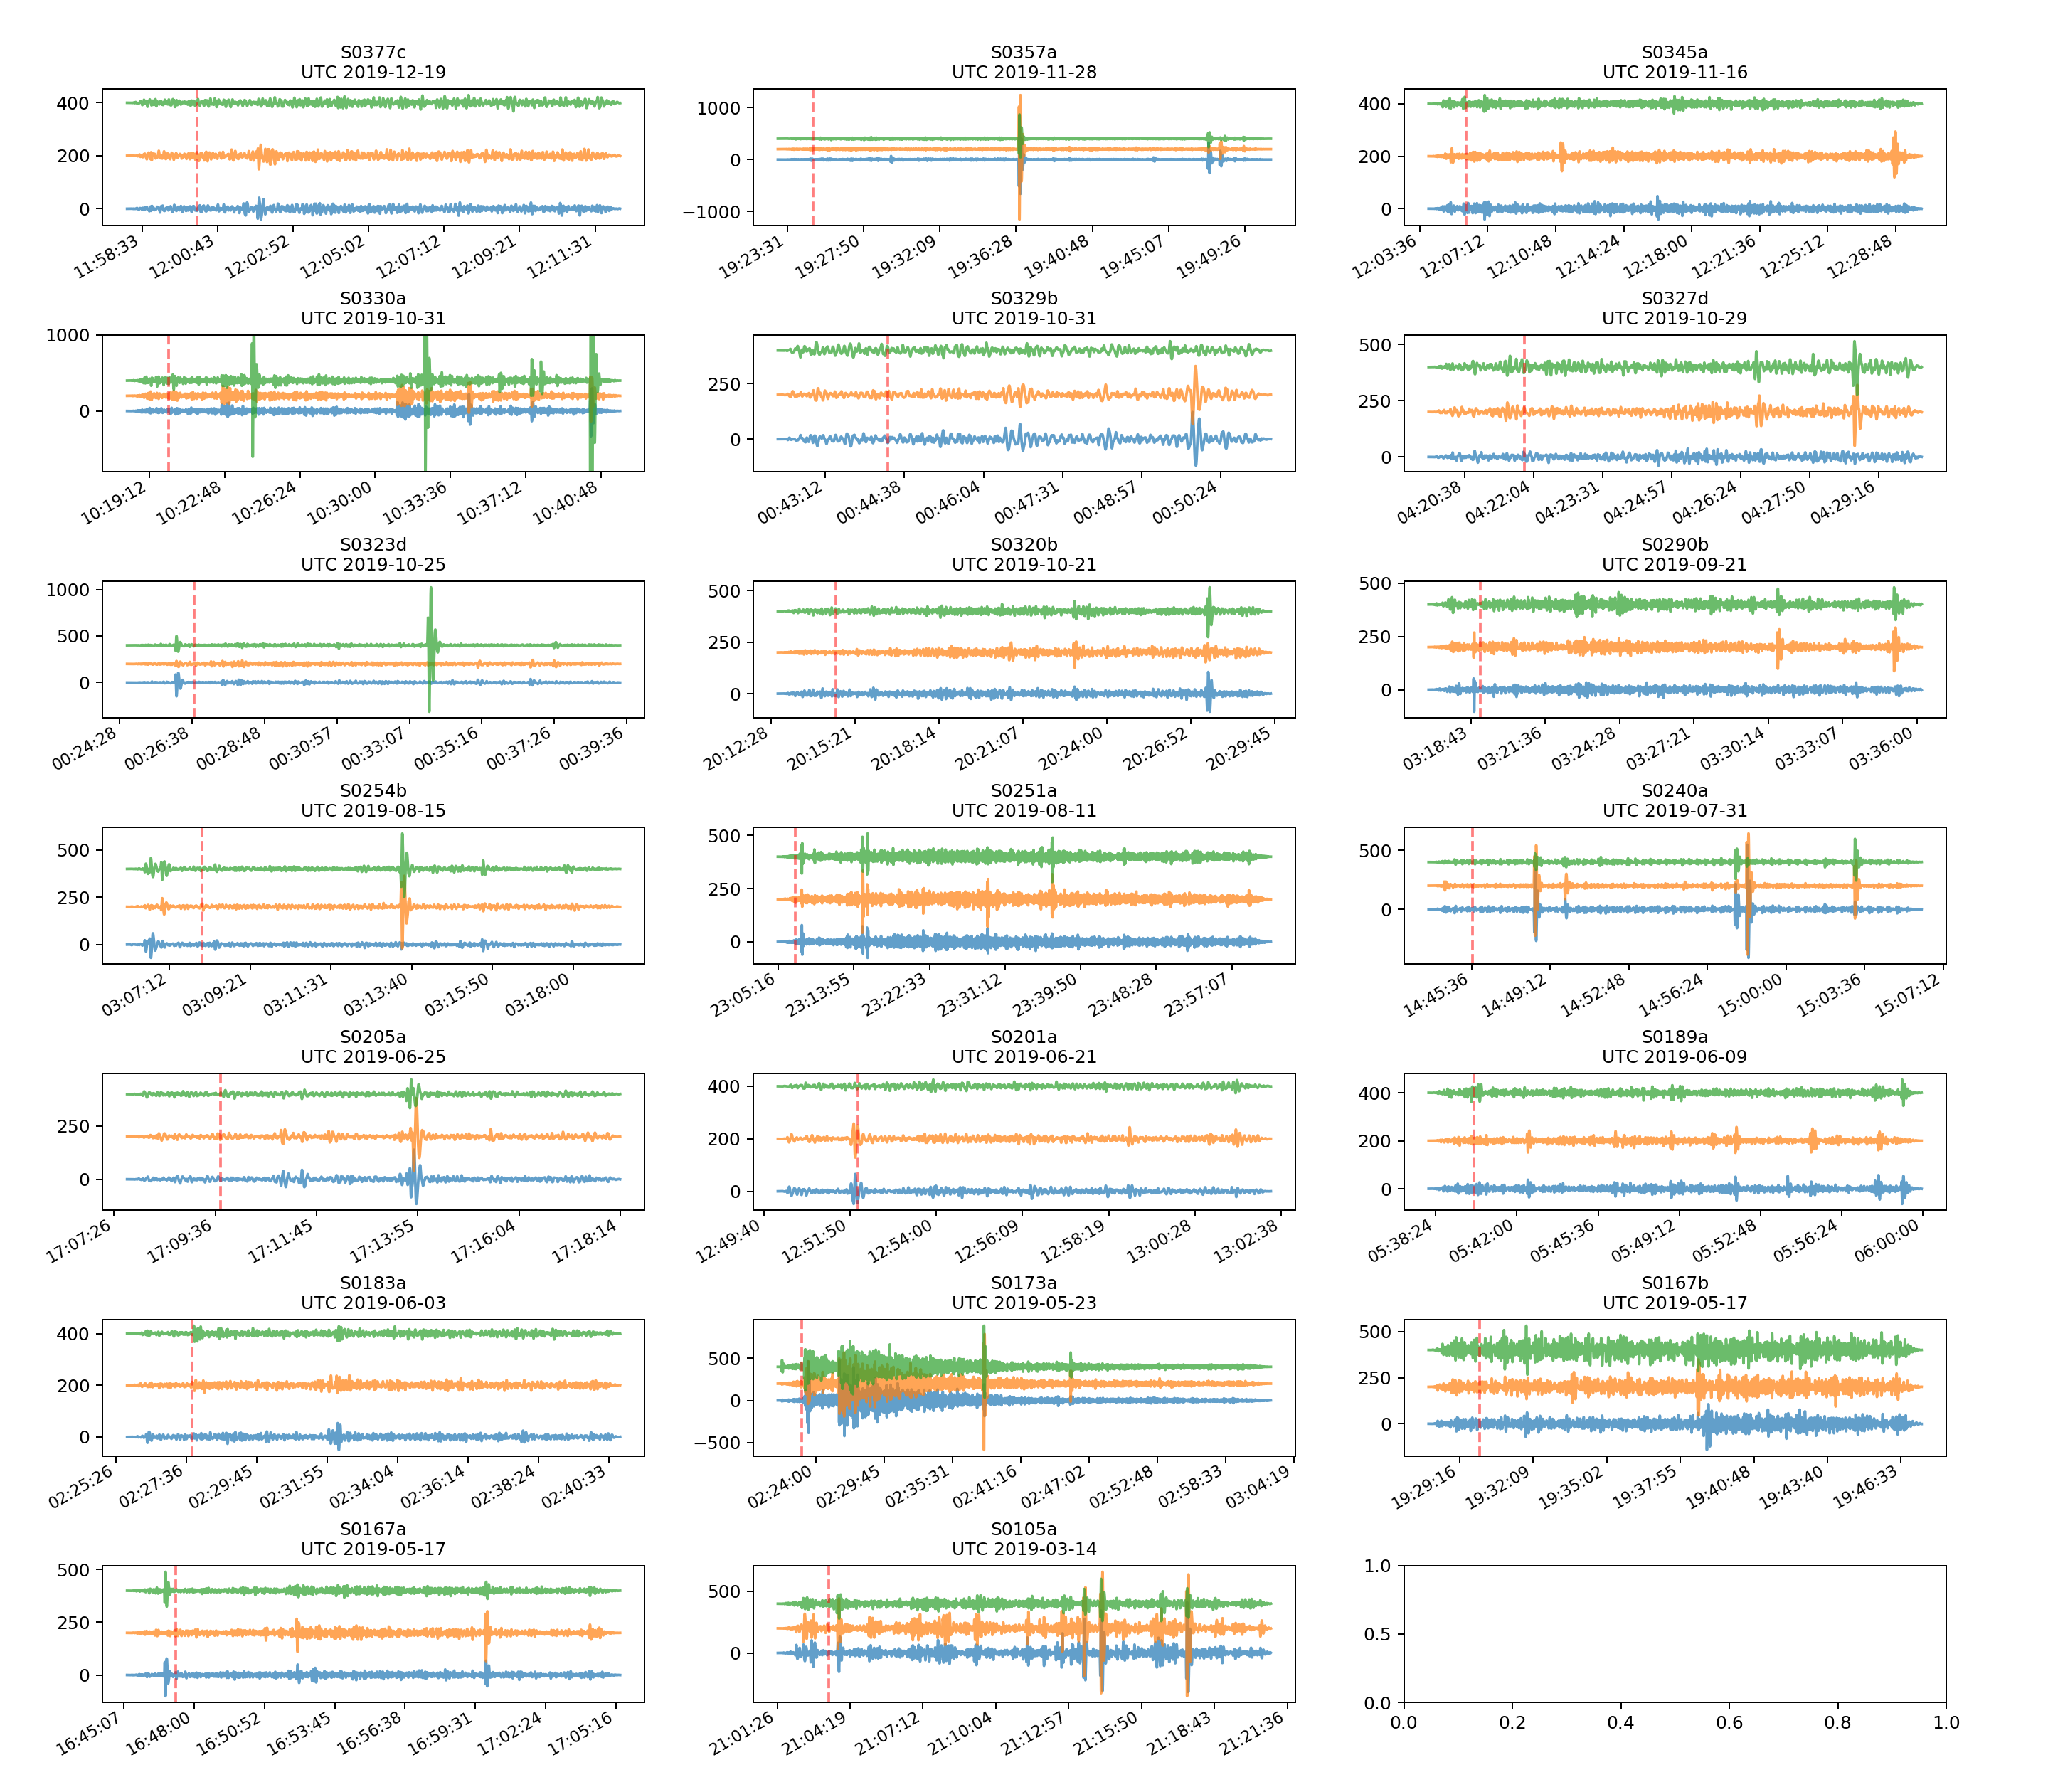

<IPython.core.display.Javascript object>


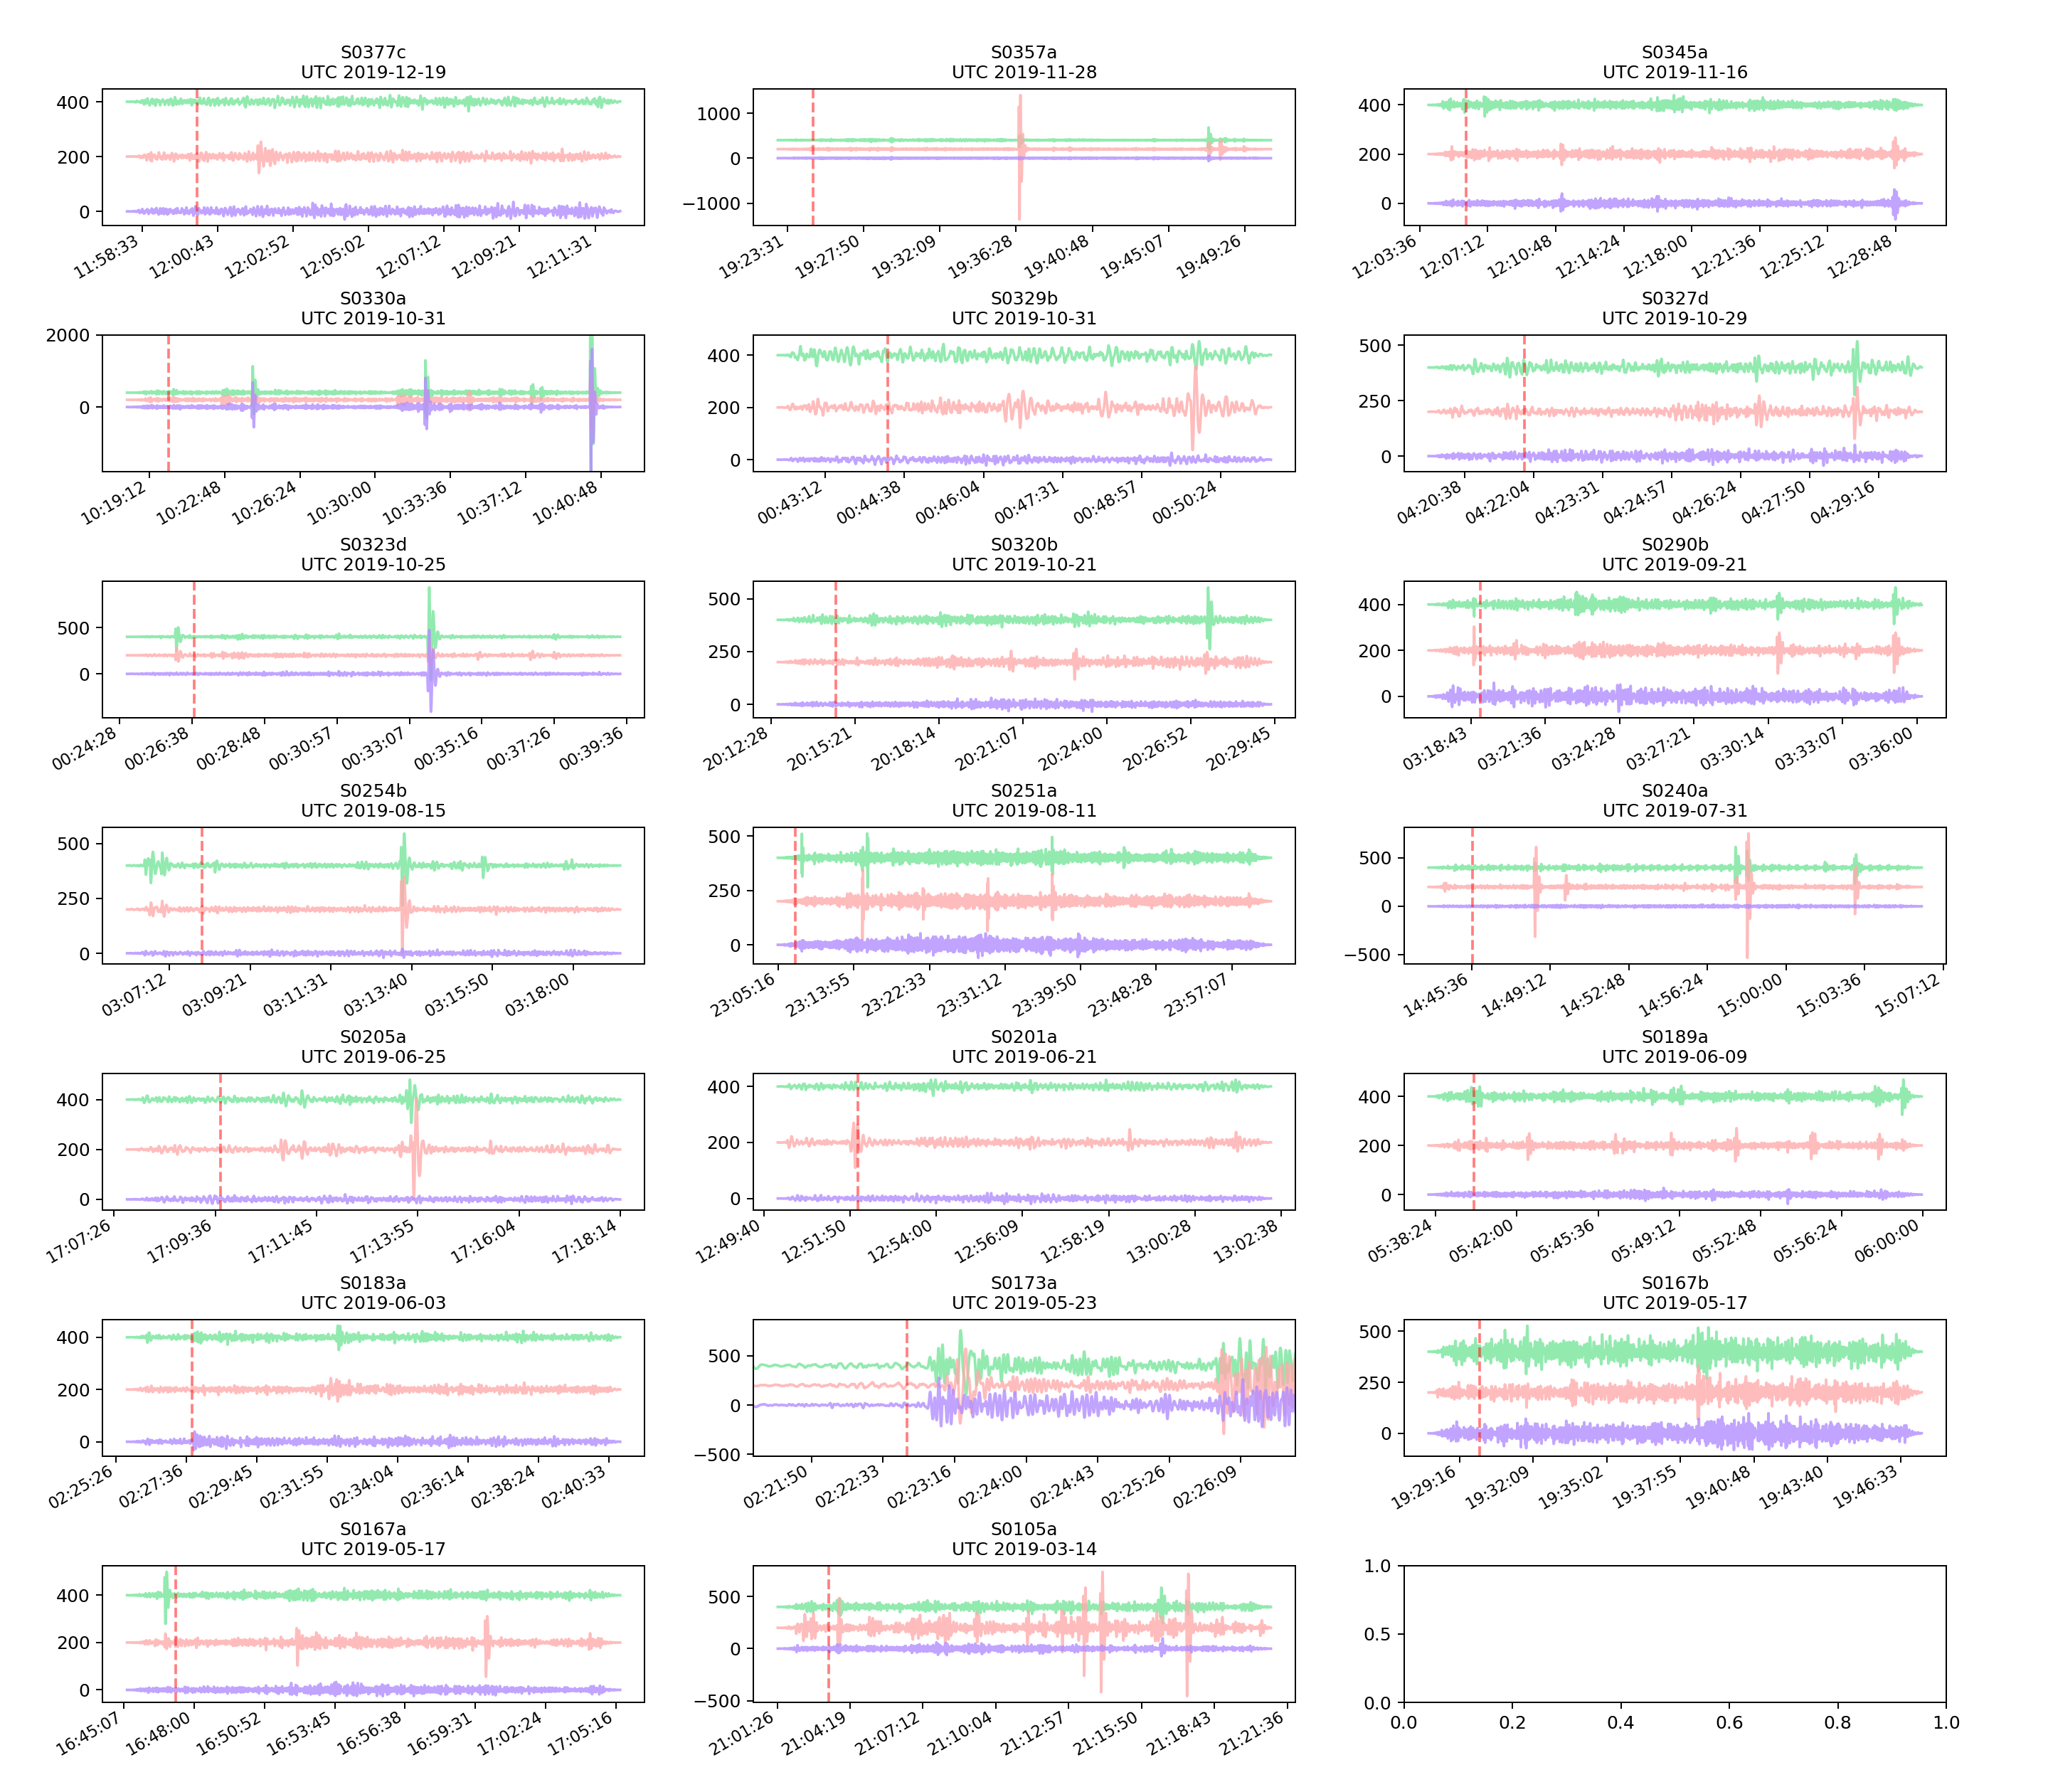

In [3]:
#creating subplot with 21 possible positions (20 events and 1 legend plot)
#ax[row][column]

#2hr window + filtered
fig1,ax = plt.subplots(7,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#2hr window + unfiltered
fig2,ax1 = plt.subplots(7,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#20min window + filtered
fig3,ax2 = plt.subplots(7,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#Z12 20min window + filtered
fig4,ax3 = plt.subplots(7,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)


In [4]:
e = 'S0377c'
### 2019-12-19T11:57:20
start377c = '2019-12-19T12:00:08' 
end377c = '2019-12-19T12:10:14'

In [5]:
st377c = waveforms(start377c, end377c, 3600)
waveform_plotter(start377c, st377c, e, ax[0][0])

f377c = waveform_filter(st377c, 'lf')
waveform_plotter(start377c, f377c, e, ax1[0][0])

short377c = waveforms(start377c, end377c, 120)
sf377c = waveform_filter(short377c, 'lf')
waveform_plotter(start377c, sf377c, e, ax2[0][0])

xyz_plotter(start377c, sf377c, e, ax3[0][0])

In [6]:
e = 'S0357a'
### 2019-11-28T19:22:00
start357a = '2019-11-28T19:24:59' 
end357a = '2019-11-28T19:48:55'

P357a = '2019-11-28T19:25:02'

In [7]:
st357a = waveforms(start357a, end357a, 3600)
waveform_plotter(start357a, st357a, e, ax[0][1])

f357a = waveform_filter(st357a, 'lf')
waveform_plotter(start357a, f357a, e, ax1[0][1])

short357a = waveforms(start357a, end357a, 120)
sf357a = waveform_filter(short357a, 'lf')
waveform_plotter(start357a, sf357a, e, ax2[0][1])

xyz_plotter(start357a, sf357a, e, ax3[0][1])

In [8]:
e = 'S0345a'
### 2019-11-16T12:03:41
start345a = '2019-11-16T12:06:04'
end345a = '2019-11-16T12:28:11'

In [9]:
st345a = waveforms(start345a, end345a, 3600)
waveform_plotter(start345a, st345a, e, ax[0][2])

f345a = waveform_filter(st345a, 'lf')
waveform_plotter(start345a, f345a, e, ax1[0][2])

short345a = waveforms(start345a, end345a, 120)
sf345a = waveform_filter(short345a, 'lf')
waveform_plotter(start345a, sf345a, e, ax2[0][2])

xyz_plotter(start345a, sf345a, e, ax3[0][2])

In [10]:
e = 'S0330a'
### 2019-10-31T10:05:39
start330a = '2019-10-31T10:20:08'
end330a = '2019-10-31T10:39:43'

In [11]:
st330a = waveforms(start330a, end330a, 3600)
waveform_plotter(start330a, st330a, e, ax[1][0], ylim=True)

f330a = waveform_filter(st330a, 'lf')
waveform_plotter(start330a, f330a, e, ax1[1][0], ylim=True)

short330a = waveforms(start330a, end330a, 120)
sf330a = waveform_filter(short330a, 'lf')
waveform_plotter(start330a, sf330a, e, ax2[1][0], ylim=True)

xyz_plotter(start330a, sf330a, e, ax3[1][0], ylim=True)

In [12]:
e = 'S0329b'
### 2019-10-31T00:42:58
start329b = '2019-10-31T00:44:20' 
end329b = '2019-10-31T00:49:19'

In [13]:
st329b = waveforms(start329b, end329b, 3600)
waveform_plotter(start329b, st329b, e, ax[1][1])

f329b = waveform_filter(st329b, 'lf')
waveform_plotter(start329b, f329b, e, ax1[1][1])

short329b = waveforms(start329b, end329b, 120)
sf329b = waveform_filter(short329b, 'lf')
waveform_plotter(start329b, sf329b, e, ax2[1][1])

xyz_plotter(start329b, sf329b, e, ax3[1][1])

In [14]:
e = 'S0327d'
### 2019-10-29T04:20:35
start327d = '2019-10-29T04:21:53'
end327d = '2019-10-29T04:28:11'

In [15]:
st327d = waveforms(start327d, end327d, 3600)
waveform_plotter(start327d, st327d, e, ax[1][2])

f327d = waveform_filter(st327d, 'lf')
waveform_plotter(start327d, f327d, e, ax1[1][2])

short327d = waveforms(start327d, end327d, 120)
sf327d = waveform_filter(short327d, 'lf')
waveform_plotter(start327d, sf327d, e, ax2[1][2])

xyz_plotter(start327d, sf327d, e, ax3[1][2])

In [16]:
e = 'S0323d'
### 2019-10-25T00:20:29
start323d = '2019-10-25T00:26:42'
end323d = '2019-10-25T00:37:24'

In [17]:
st323d = waveforms(start323d, end323d, 3600)
waveform_plotter(start323d, st323d, e, ax[2][0])

f323d = waveform_filter(st323d, 'lf')
waveform_plotter(start323d, f323d, e, ax1[2][0])

short323d = waveforms(start323d, end323d, 120)
sf323d = waveform_filter(short323d, 'lf')
waveform_plotter(start323d, sf323d, e, ax2[2][0])

xyz_plotter(start323d, sf323d, e, ax3[2][0])

In [18]:
e = 'S0320b'
### 2019-10-21T20:09:07
start320b = '2019-10-21T20:14:42'
end320b = '2019-10-21T20:27:38'

In [19]:
st320b = waveforms(start320b, end320b, 3600)
waveform_plotter(start320b, st320b, e, ax[2][1])

f320b = waveform_filter(st320b, 'lf')
waveform_plotter(start320b, f320b, e, ax1[2][1])

short320b = waveforms(start320b, end320b, 120)
sf320b = waveform_filter(short320b, 'lf')
waveform_plotter(start320b, sf320b, e, ax2[2][1])

xyz_plotter(start320b, sf320b, e, ax3[2][1])

In [20]:
e = 'S0290b'
### 2019-09-21T03:15:42
start290b = '2019-09-21T03:19:05'
end290b = '2019-09-21T03:34:11'

P290b = '2019-09-21T03:19:09'

S290b = '2019-09-21T03:22:04'

In [21]:
st290b = waveforms(start290b, end290b, 3600)
waveform_plotter(start290b, st290b, e, ax[2][2])

f290b = waveform_filter(st290b, 'lf')
waveform_plotter(start290b, f290b, e, ax1[2][2])

short290b = waveforms(start290b, end290b, 120)
sf290b = waveform_filter(short290b, 'lf')
waveform_plotter(start290b, sf290b, e, ax2[2][2])

xyz_plotter(start290b, sf290b, e, ax3[2][2])

In [22]:
e = 'S0254b'
### 2019-08-15T03:06:01
start254b = '2019-08-15T03:08:04'
end254b = '2019-08-15T03:17:15'

In [23]:
st254b = waveforms(start254b, end254b, 3600)
waveform_plotter(start254b, st254b, e, ax[3][0])

f254b = waveform_filter(st254b, 'lf')
waveform_plotter(start254b, f254b, e, ax1[3][0])

short254b = waveforms(start254b, end254b, 120)
sf254b = waveform_filter(short254b, 'lf')
waveform_plotter(start254b, sf254b, e, ax2[3][0])

xyz_plotter(start254b, sf254b, e, ax3[3][0])

In [24]:
e = 'S0251a'
### 2019-08-11T23:06:24
start251a = '2019-08-11T23:07:15'
end251a = '2019-08-11T23:59:34'

In [25]:
st251a = waveforms(start251a, end251a, 3600)
waveform_plotter(start251a, st251a, e, ax[3][1])

f251a = waveform_filter(st251a, 'lf')
waveform_plotter(start251a, f251a, e, ax1[3][1])

short251a = waveforms(start251a, end251a, 120)
sf251a = waveform_filter(short251a, 'lf')
waveform_plotter(start251a, sf251a, e, ax2[3][1])

xyz_plotter(start251a, sf251a, e, ax3[3][1])

In [26]:
e = 'S0240a'
### 2019-07-31T14:45:05
start240a = '2019-07-31T14:45:38'
end240a = '2019-07-31T15:04:13'

In [27]:
st240a = waveforms(start240a, end240a, 3600)
waveform_plotter(start240a, st240a, e, ax[3][2])

f240a = waveform_filter(st240a, 'lf')
waveform_plotter(start240a, f240a, e, ax1[3][2])

short240a = waveforms(start240a, end240a, 120)
sf240a = waveform_filter(short240a, 'lf')
waveform_plotter(start240a, sf240a, e, ax2[3][2])

xyz_plotter(start240a, sf240a, e, ax3[3][2])

In [28]:
e = 'S0205a'
### 2019-06-25T17:10:10
start205a = '2019-06-25T17:09:43'
end205a = '2019-06-25T17:16:14'

In [29]:
st205a = waveforms(start205a, end205a, 3600)
waveform_plotter(start205a, st205a, e, ax[4][0])

f205a = waveform_filter(st205a, 'lf')
waveform_plotter(start205a, f205a, e, ax1[4][0])

short205a = waveforms(start205a, end205a, 120)
sf205a = waveform_filter(short205a, 'lf')
waveform_plotter(start205a, sf205a, e, ax2[4][0])

xyz_plotter(start205a, sf205a, e, ax3[4][0])

In [30]:
e = 'S0201a'
### 2019-06-21T12:52:03
start201a = '2019-06-21T12:52:02' 
end201a = '2019-06-21T13:00:23'

In [31]:
st201a = waveforms(start201a, end201a, 3600)
waveform_plotter(start201a, st201a, e, ax[4][1])

f201a = waveform_filter(st201a, 'lf')
waveform_plotter(start201a, f201a, e, ax1[4][1])

short201a = waveforms(start201a, end201a, 120)
sf201a = waveform_filter(short201a, 'lf')
waveform_plotter(start201a, sf201a, e, ax2[4][1])

xyz_plotter(start201a, sf201a, e, ax3[4][1])

In [32]:
e =  'S0189a'
### 2019-06-09T05:37:50
start189a = '2019-06-09T05:40:05'
end189a = '2019-06-09T05:57:57'

P189a = '2019-06-09T05:40:05'

S189a = '2019-06-09T05:43:19'

In [33]:
st189a = waveforms(start189a, end189a, 3600)
waveform_plotter(start189a, st189a, e, ax[4][2])

f189a = waveform_filter(st189a, 'lf')
waveform_plotter(start189a, f189a, e, ax1[4][2])

short189a = waveforms(start189a, end189a, 120)
sf189a = waveform_filter(short189a, 'lf')
waveform_plotter(start189a, sf189a, e, ax2[4][2])

xyz_plotter(start189a, sf189a, e, ax3[4][2])

In [34]:
e = 'S0183a'
### 2019-06-03T02:27:46
start183a = '2019-06-03T02:27:47'
end183a = '2019-06-03T02:38:54'

In [35]:
st183a = waveforms(start183a, end183a, 3600)
waveform_plotter(start183a, st183a, e, ax[5][0])

f183a = waveform_filter(st183a, 'lf')
waveform_plotter(start183a, f183a, e, ax1[5][0])

short183a = waveforms(start183a, end183a, 120)
sf183a = waveform_filter(short183a, 'lf')
waveform_plotter(start183a, sf183a, e, ax2[5][0])

xyz_plotter(start183a, sf183a, e, ax3[5][0])

In [36]:
e = 'S0173a'
### 2019-05-23T02:19:33
start173a = '2019-05-23T02:22:48'
end173a = '2019-05-23T03:00:23'

P173a = '2019-05-23T02:22:59'

S173a = '2019-05-23T02:25:53'

In [37]:
st173a = waveforms(start173a, end173a, 3600)
waveform_plotter(start173a, st173a, e, ax[5][1])

f173a = waveform_filter(st173a, 'lf')
waveform_plotter(start173a, f173a, e, ax1[5][1])

short173a = waveforms(start173a, end173a, 120)
sf173a = waveform_filter(short173a, 'lf')
waveform_plotter(start173a, sf173a, e, ax2[5][1])

xyz_plotter(start173a, sf173a, e, ax3[5][1])

In [38]:
e = 'S0167b'
### 2019-05-17T16:29:32
start167b = '2019-05-17T19:30:04' 
end167b = '2019-05-17T19:45:22'

In [39]:
st167b = waveforms(start167b, end167b, 3600)
waveform_plotter(start167b, st167b, e, ax[5][2])

f167b = waveform_filter(st167b, 'lf')
waveform_plotter(start167b, f167b, e, ax1[5][2])

short167b = waveforms(start167b, end167b, 120)
sf167b = waveform_filter(short167b, 'lf')
waveform_plotter(start167b, sf167b, e, ax2[5][2])

xyz_plotter(start167b, sf167b, e, ax3[5][2])

In [40]:
e = 'S0167a'
### 2019-05-17T16:39:32
start167a = '2019-05-17T16:47:15' 
end167a = '2019-05-17T17:03:27'

In [41]:
st167a = waveforms(start167a, end167a, 3600)
waveform_plotter(start167a, st167a, e, ax[6][0])

f167a = waveform_filter(st167a, 'lf')
waveform_plotter(start167a, f167a, e, ax1[6][0])

short167a = waveforms(start167a, end167a, 120)
sf167a = waveform_filter(short167a, 'lf')
waveform_plotter(start167a, sf167a, e, ax2[6][0])

xyz_plotter(start167a, sf167a, e, ax3[6][0])

In [42]:
e = 'S0105a'
### 2019-03-14T20:59:38
start105a = '2019-03-14T21:03:28'
end105a = '2019-03-14T21:18:57'

In [43]:
st105a = waveforms(start105a, end105a, 3600)
waveform_plotter(start105a, st105a, e, ax[6][1])

f105a = waveform_filter(st105a, 'lf')
waveform_plotter(start105a, f105a, e, ax1[6][1])

short105a = waveforms(start105a, end105a, 120)
sf105a = waveform_filter(short105a, 'lf')
waveform_plotter(start105a, sf105a, e, ax2[6][1])

xyz_plotter(start105a, sf105a, e, ax3[6][1])

In [44]:
#fig1.savefig('UVW_2hr_filtered.pdf')
#fig2.savefig('UVW_2hr_unfiltered.pdf')
#fig3.savefig('UVW_zoomed.pdf')
#fig4.savefig('Z12_zoomed.pdf')